In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [4]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

Data Preprocessing

In [0]:
#data imputation
TotalChargesMedian = df[df.TotalCharges != ' ']['TotalCharges'].astype('float32').median()

In [12]:
df['TotalCharges'][df['TotalCharges'] == ' '] = TotalChargesMedian

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
df.TotalCharges.value_counts()

df['TotalCharges'] = df['TotalCharges'].astype('float32')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float32
Churn               7043 non-null object
dtypes: float32(1), float64(1), 

In [21]:
if not df.isnull().sum().sum():
  print("There are no missing values")

There are no missing values


In [0]:
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines','InternetService', 'OnlineSecurity',
               'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','Contract', 'StreamingMovies', 'PaperlessBilling','PaymentMethod', 'Churn']
numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']               

In [0]:
for col in categorical:
  df[col] = pd.Categorical(df[col])

for col in numerical:
  df[col] = df[col].astype('float32')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null category
SeniorCitizen       7043 non-null category
Partner             7043 non-null category
Dependents          7043 non-null category
tenure              7043 non-null float32
PhoneService        7043 non-null category
MultipleLines       7043 non-null category
InternetService     7043 non-null category
OnlineSecurity      7043 non-null category
OnlineBackup        7043 non-null category
DeviceProtection    7043 non-null category
TechSupport         7043 non-null category
StreamingTV         7043 non-null category
StreamingMovies     7043 non-null category
Contract            7043 non-null category
PaperlessBilling    7043 non-null category
PaymentMethod       7043 non-null category
MonthlyCharges      7043 non-null float32
TotalCharges        7043 non-null float32
Churn               7043 non-null cate

In [0]:
df = df.drop(columns=['customerID'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null category
SeniorCitizen       7043 non-null category
Partner             7043 non-null category
Dependents          7043 non-null category
tenure              7043 non-null float32
PhoneService        7043 non-null category
MultipleLines       7043 non-null category
InternetService     7043 non-null category
OnlineSecurity      7043 non-null category
OnlineBackup        7043 non-null category
DeviceProtection    7043 non-null category
TechSupport         7043 non-null category
StreamingTV         7043 non-null category
StreamingMovies     7043 non-null category
Contract            7043 non-null category
PaperlessBilling    7043 non-null category
PaymentMethod       7043 non-null category
MonthlyCharges      7043 non-null float32
TotalCharges        7043 non-null float32
Churn               7043 non-null category
dtypes: category(17), float32(3)
mem

In [31]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371147,64.761826,2281.915039
std,24.559708,30.089973,2265.270752
min,0.000000,18.250000,18.799999
25%,9.000000,35.500000,402.225006
50%,29.000000,70.349998,1397.475098
75%,55.000000,89.849998,3786.599976
max,72.000000,118.750000,8684.799805


In [33]:
df.describe(include= ['category'])

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


Analisys

No     5174
Yes    1869
Name: Churn, dtype: int64


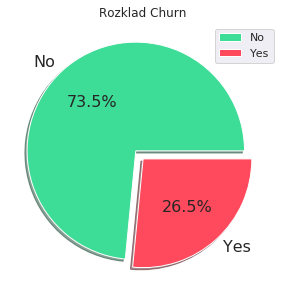

In [42]:
plt.figure(figsize=(7,5))
sns.set()
df.Churn.value_counts().plot(kind='pie',
                             fontsize = 16,
                             colors = ['#3DDC97', '#FF495C'],
                             explode = [0.1,0],
                             shadow = True,
                             autopct = '%1.1f%%')
plt.legend()
plt.ylabel('')
plt.title('Rozklad Churn')
print(df.Churn.value_counts())

In [0]:
def pie_chart(colname = 'gender', kind = 'pie', legend = ['Male', 'Female'], title = 'Wykres'):

  plt.figure(figsize=(7,5))
  sns.set()
  df[colname].value_counts().plot(kind=kind,
                              fontsize = 16,
                                labels = ['',''],
                              colors = ['#3DDC97', '#FF495C'],
                              explode = [0.1,0],
                              shadow = True,
                              autopct = '%1.1f%%')
  plt.legend(legend)
  plt.ylabel('')
  plt.title(title)
  print(df.Churn.value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


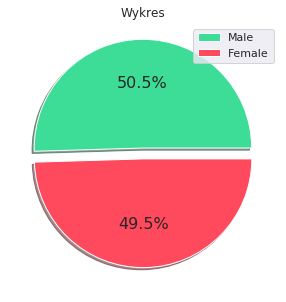

In [58]:
pie_chart()

No     5174
Yes    1869
Name: Churn, dtype: int64


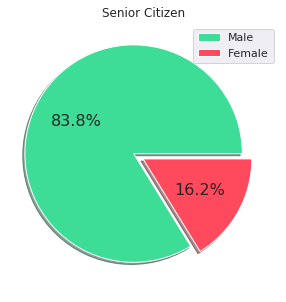

In [61]:
pie_chart(colname = 'SeniorCitizen', title = 'Senior Citizen')

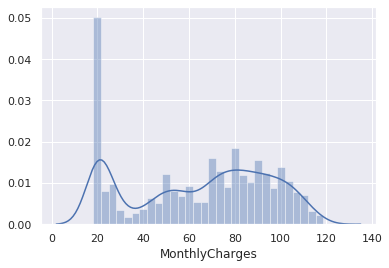

In [63]:
sns.distplot(df.MonthlyCharges, bins = 30)

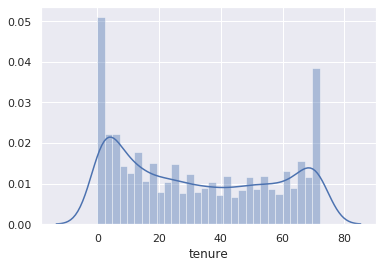

In [64]:
sns.distplot(df.tenure, bins = 30)

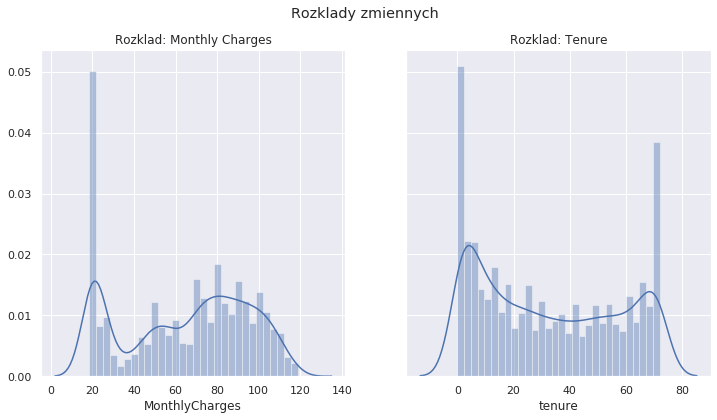

In [74]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharey = True, figsize = (12,6))
sns.distplot(df.MonthlyCharges, bins = 30, ax = ax[0])
sns.distplot(df.tenure, bins = 30, ax = ax[1])

fig.suptitle('Rozklady zmiennych')
ax[0].title.set_text('Rozklad: Monthly Charges')
ax[1].title.set_text('Rozklad: Tenure')

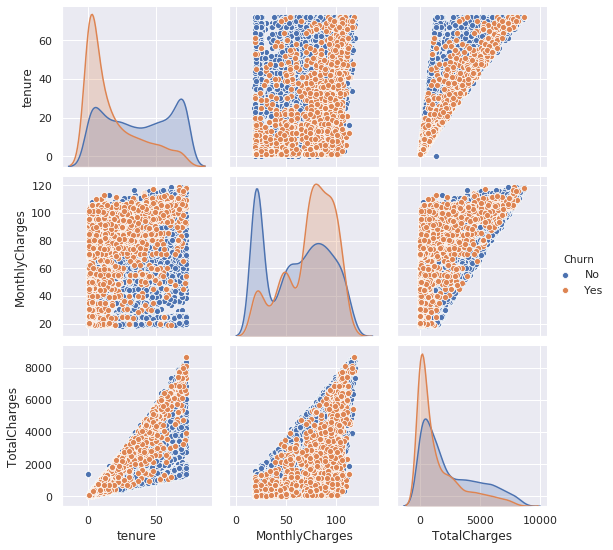

In [76]:
sns.pairplot(data = df, vars = numerical, hue = 'Churn')

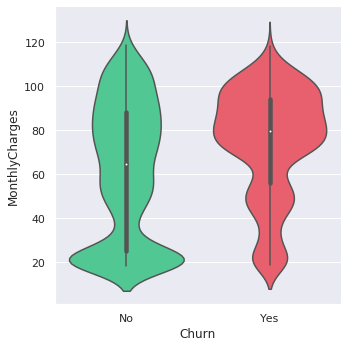

In [78]:
sns.catplot(data = df, x = 'Churn', y = 'MonthlyCharges', 
            kind = 'violin', palette = ['#3DDC97', '#FF495C'])

Corr Matrix

In [79]:
df.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.825464
MonthlyCharges,0.247900,1.000000,0.650864
TotalCharges,0.825464,0.650864,1.000000


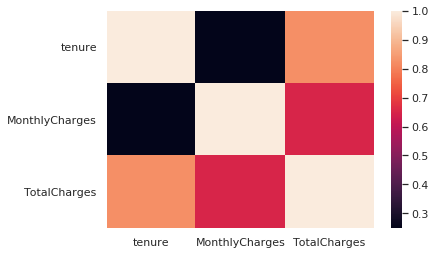

In [80]:
sns.heatmap(df.corr())